# Comparison of Different Optimizers for QAOA (Max Cut)
In this notebook different optimizers for the QAOA parameters are compared. The approximation ratios obtained by using the different optimizers are compared, as well as the value of the QAOA parameters. 

# Importing necessary modules

In [8]:
#run: pip install openquantumcomputing
from openquantumcomputing.QAOAMaxCut import QAOAMaxCut
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
from qiskit.visualization import *
from qiskit_algorithms.optimizers import SPSA, QNSPSA, COBYLA, NELDER_MEAD

# Creating problem instance
Data for graph generation is found at https://github.com/OpenQuantumComputing/data

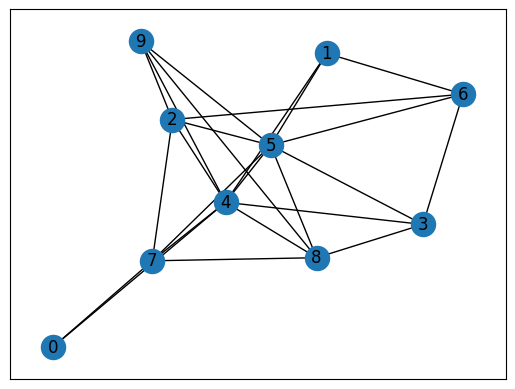

In [9]:
numV=10 #Number of vertices
G = nx.read_gml("/Users/olaib/QuantumComputing/Data//data/sample_graphs/w_ba_n"+str(numV)+"_k4_0.gml")

pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos)
mincost=-8.657714089848158

# Setting up the optimizers to use roughly the same number of function evaluations

In [10]:
optimizers={}
plotstyle={}

settings = {
    "maxiter": 70,
    "blocking": True,
    "allowed_increase": 0,
    "second_order": True,
    "regularization": 0.01
}
optimizers["spsa"] = [SPSA, settings.copy()]
plotstyle["spsa"] = '+-'

settings = {
    "maxiter": 50,
    "blocking": True,
    "allowed_increase": 0,
    "learning_rate": 0.02,
    "perturbation": 0.05,
    "regularization": 0.01,
    "hessian_delay": 0
}
optimizers["qnspsa"] = [QNSPSA, settings.copy()]
plotstyle["qnspsa"] = 'o-'

settings = {
    "maxiter": 110,
    "tol": 1e-6 
}
optimizers["neldermead"] = [NELDER_MEAD, settings.copy()]
plotstyle["neldermead"] = 'x-'

settings = {
    "maxiter": 350,
    "tol": 1e-6 
}
optimizers["cobyla"] = [COBYLA, settings.copy()]
plotstyle["cobyla"] = '*-'

# Creating a QAOA instance for each optimizer

In [11]:
qaoa={}
for key in optimizers:
    qaoa[key]=QAOAMaxCut(params={'G' : G, 'optimizer' : optimizers[key]})

# Sample cost landscape for each QAOA instance

In [12]:
for key in optimizers:
    qaoa[key].sample_cost_landscape(angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})

Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done
Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done
Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done
Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done


# Plotting the cost landscape
The cost landscape is of course the same for all the optimizer methods and is plotted below.

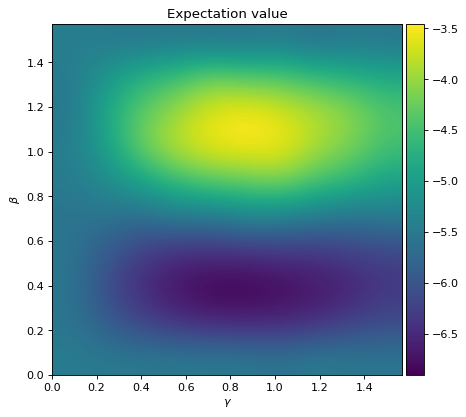

In [13]:
method = "cobyla"

f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoa[method].E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

# Increasing depth for each QAOA instance

In [14]:
maxdepth=10
for i in range(maxdepth):
    for key in optimizers:
        qaoa[key].increase_depth()

cost(depth= 1 )= -6.95022734519229
cost(depth= 1 )= -6.934077073105
cost(depth= 1 )= -7.05422470105697
cost(depth= 1 )= -6.879729864387171
cost(depth= 2 )= -7.489907453799508
cost(depth= 2 )= -7.4589843315519
cost(depth= 2 )= -7.579995133337515
cost(depth= 2 )= -7.54408070086928
cost(depth= 3 )= -7.754382497968987
cost(depth= 3 )= -7.587095519876228
cost(depth= 3 )= -7.780793586237203
cost(depth= 3 )= -7.732553901455373
cost(depth= 4 )= -7.943169517698906
cost(depth= 4 )= -7.850090761065233
cost(depth= 4 )= -7.861569254922865
cost(depth= 4 )= -7.765339422885894
cost(depth= 5 )= -8.02381357355264
cost(depth= 5 )= -8.005762031006585
cost(depth= 5 )= -8.032345224527617
cost(depth= 5 )= -7.929559865432195
cost(depth= 6 )= -8.16282271078206
cost(depth= 6 )= -8.164035801481416
cost(depth= 6 )= -8.047980300762072
cost(depth= 6 )= -8.09181310078379
cost(depth= 7 )= -8.211875004688231
cost(depth= 7 )= -8.257074483188484
cost(depth= 7 )= -8.054560564107858
cost(depth= 7 )= -8.115224464491554
cos

# Plotting the approximation ratios
Below the approximation ratios are plotted for the different optimizers. From the figure we see that the different optimizers give roughly the same approximation ratio.

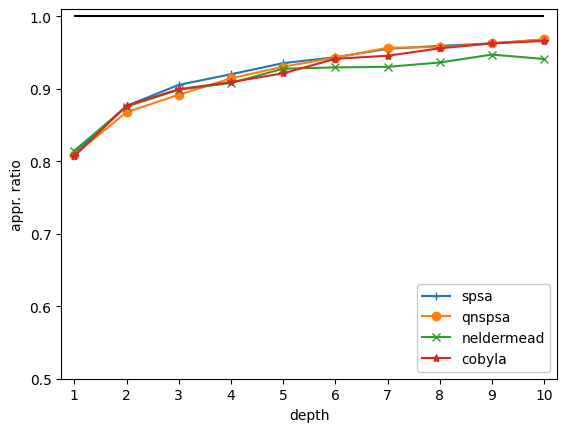

In [15]:
ax = pl.figure().gca()
pl.hlines(1, 1,maxdepth, linestyles="solid", colors="black")
for key in optimizers:
    pl.plot(np.arange(1,maxdepth+1), np.array(list(qaoa[key].costval.values()))/mincost, plotstyle[key], label=key)
pl.ylim(0.5,1.01)
pl.xlim(1-.25,maxdepth+.25)
_=pl.ylabel('appr. ratio')
_=pl.xlabel('depth')
_=pl.legend(loc="lower right", framealpha=1)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Plotting the values for the parameters
Below we plot the values for $\gamma$ and $\beta$ parameters found by the different optimizers. The values found are seen to be relatively similar for all the optimizers (except for an outlier at depth = 10 for the cobyla method). Importantly, the value for $\gamma$ is seen to be increasing with depth and the value of $\beta$ is seen to be decreasing with depth, in accordance with the heuristic strategy used to find the values for the parameters (see Quantum Approximate Optimization Algorithm: Performance, Mechanism, and Implementation on Near-Term Devices by Zhou et al.)

(MISLEADING?? really: new parameters)

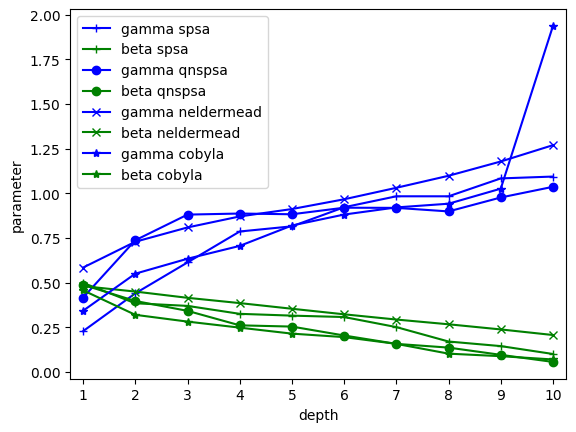

In [16]:
ax = pl.figure().gca()
for key in optimizers:
    pl.plot(np.arange(1,maxdepth+1),qaoa[key].angles_hist['d'+str(maxdepth)+'_final'][::2],"b"+plotstyle[key],label='gamma '+key)
    pl.plot(np.arange(1,maxdepth+1),qaoa[key].angles_hist['d'+str(maxdepth)+'_final'][1::2],"g"+plotstyle[key],label='beta '+key)
pl.xlim(1-.25,maxdepth+.25)
_=pl.ylabel('parameter')
_=pl.xlabel('depth')
_=pl.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Plotting the number of function evaluations used by each optimizer
Below the number of function evaluations used by the different optimizers are plotted for increasing depths. 

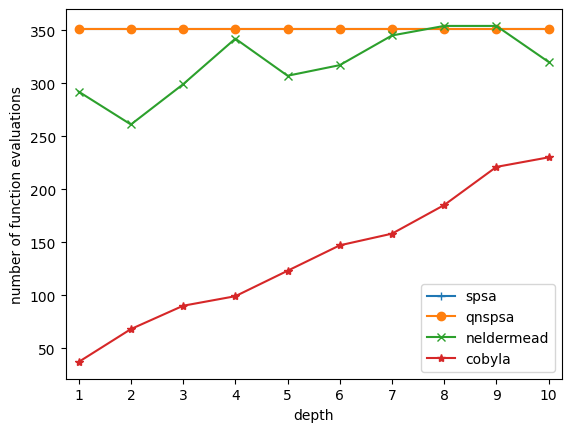

In [17]:
ax = pl.figure().gca()
for key in optimizers:
    _=pl.plot(np.arange(1,maxdepth+1),qaoa[key].num_fval.values(), plotstyle[key], label=key)
pl.xlim(1-.25,maxdepth+.25)
_=pl.ylabel('number of function evaluations')
_=pl.xlabel('depth')
_=pl.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))